# Proyecto práctico

## Unidad 3 - Aprendizaje supervisado

El proyecto práctico consiste en abordar un problema de clasificación de documentos textuales. Tenemos a nuestra disposición un dataset de noticias de prensa en español publicada por el medio "CNN Chile".

Las noticias están divididas en 7 categorías temáticas: *'pais','deportes','tendencias','tecnologias','cultura','economia','mundo'*

El proyecto se divide en dos partes:

- Utilizar al menos 3 estrategías para entrenar modelos de clasificación capaces de clasificar las noticias según su categoría temática.

- Explorar cuáles son las características que permiten explicar las decisiones de su modelo.

## 0. Evaluación

El proyecto se realiza de forma individual. Se entrega a más tardar el **lunes 30 de noviembre** en su repositorio GitHub.

**Pauta de evaluación:**

Competencia 1: Aplicar un protocolo de aprendizaje supervisado para resolver un problema clasificación estandar, utilizando un entorno de programación en Python

- < 2 : El protocolo de aprendizaje supervisado utilizado es incompleto y/o presenta errores importantes
- 2 a 3.9 : El protocolo de aprendizaje supervisado utilizado es incompleto o presenta un error importante
- 4 a 5.5 : El protocolo de aprendizaje es completo, no tiene error, pero las estrategias utilizadas son relativamente simples y el rendimiento de los modelos es perfectible.
- 5.6 a 7.0 : El protocolo de aprendizaje es completo, no tiene error y al menos una de las estrategias utilizadas a necesitado un trabajado más avanzado y/o permite obtener un mejor rendimiento.

Competencia 2: Explicar el rendimiento de un modelo de clasificación aplicando un protocolo de evaluación Precision/Recall/F-Score

- < 2 : El trabajo no presenta explicaciones del rendimiento de los modelos de clasificación
- 2 a 3.9 : El trabajo presenta algunas explicaciones pero tienen errores.
- 4 a 5.5 : El trabajo presenta explicaciones correctas del rendimiento de los modelos
- 5.6 a 7 : El trabajo presenta explicaciones correctas del rendimiento de los modelos y además presenta un método para explicar las decisiones/errores


In [1]:
#!pip install -U spacy

#!python -m spacy download es

## 1. Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
df = pd.read_csv('cnnchile_7000.csv')
df.head()

country media_outlet                                                url  \
0   chile     cnnchile  https://www.cnnchile.com/pais/pdta-del-colegio...   
1   chile     cnnchile  https://www.cnnchile.com/pais/defensoria-ninez...   
2   chile     cnnchile  https://www.cnnchile.com/pais/cuanto-les-pagar...   
3   chile     cnnchile  https://www.cnnchile.com/pais/sobrino-de-aleja...   
4   chile     cnnchile  https://www.cnnchile.com/pais/analisis-sobre-e...   

                                               title  \
0  Pdta. del Colegio de Matronas explicó los ries...   
1  Defensoría de la Niñez pide al Estado velar po...   
2         ¿Cuánto les pagarán a los vocales de mesa?   
3  Sobrino de Alejandro Navarro intenta “funar” e...   
4  Análisis sobre el aumento de impuestos para al...   

                                                text  \
0  La Federación de Estudiantes de la Universidad...   
1  La Defensoría de la Niñez emitió este domingo ...   
2  El monto del bono es de dos tercios de Unidad ...   
3  Una nueva polémica tiene esta carrera presiden...   
4  Especialistas recomiendan no consumir más de 2...   

                         date category  
0  2018-03-29 00:00:00.000000     pais  
1  2020-08-02 00:00:00.000000     pais  
2  2016-10-20 00:00:00.000000     pais  
3  2017-11-13 00:00:00.000000     pais  
4  2014-05-05 00:00:00.000000     pais

In [3]:
df = df.drop(['country','media_outlet','url','date'], 1)


In [4]:
df1 = pd.DataFrame({'full text':df['title']+" "+df['text'],'category':df["category"]})

In [5]:
from pandasql import sqldf

q="""SELECT category, count(*) FROM df GROUP BY category ORDER BY count(*) DESC;"""
result=sqldf(q)
result

category  count(*)
0   tendencias      1000
1  tecnologias      1000
2         pais      1000
3        mundo      1000
4     economia      1000
5     deportes      1000
6      cultura      1000

In [6]:
import spacy

#nlp = spacy.load("en")
nlp = spacy.load('es_core_news_sm')

from sklearn.feature_extraction.text import CountVectorizer

def feature_extraction(text):
    
    mytokens = nlp(text)

    #Guardamos las palabras como características si corresponden a ciertas categorias gramaticales
    mytokens = [ word for word in mytokens if word.pos_ in ["NOUN", "ADJ", "VERB"] ]
    
    #Transformamos las palabras en minusculas
    mytokens = [ word.lemma_.lower().strip() for word in mytokens ]
    #print(mytokens)
    # return preprocessed list of tokens
    return mytokens

In [7]:
bow_vector = CountVectorizer(tokenizer = feature_extraction, min_df=0., max_df=1.0)
bow_vector

CountVectorizer(min_df=0.0,
                tokenizer=<function feature_extraction at 0x0000019CF1848940>)

In [8]:
from pandas import DataFrame
from sklearn.feature_extraction.text import TfidfVectorizer

#v = TfidfVectorizer(decode_error='replace', encoding='utf-8')
X = bow_vector.fit_transform(df1["full text"][0:100].values.astype('U'))



print(DataFrame(X.A, columns=bow_vector.get_feature_names()).to_string())

    $  '  -preclasificados  -reconocido  03:00  1  1921  1956  1988  2004  2009  2012-2030  2013  2015  2016  2016-2017  2017  2018  2019  2020  3  7  =  @pamjiles  abanderar  abandonar  abarcar  abastecimiento  abocar  abogar  abordar  abortar  abott  abril  abrir  absoluto  absurdo  abundante  abusadores  abusar  abusivo  abuso  académico  acceder  acceso  accionar  acción  acelerar  aceptar  acercamiento  acercar  acidificación  aclarar  acoger  acompañamiento  acompañar  aconcagua  acondicionar  acordar  acorde  acortar  acosar  acostumbrar  acostumbrarnos  acotar  acta  actividad  activista  activo  acto  actor  actuación  actual  actualidad  actualización  actualizarse  actuar  acudir  acuerdo  acumular  acusación  acusar  adaptación  adecuándonos  adjudicación  adjuntar  adjunto  administrativo  admitir  admplayer  adolescente  adoptar  aduanero  aducir  adulto  advertir  afectar  afiliación  afiliar  afinar  afirmar  aforar  agenciar  agenda  agente  agostar  agradecer  agredir

In [9]:
from sklearn.model_selection import train_test_split

X = df1['full text'] 
ylabels = df1['category']

In [10]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
ylabels_encoded = lb.fit_transform(ylabels)

In [11]:
ylabels_encoded[:5]

array([4, 4, 4, 4, 4])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, ylabels_encoded, test_size=0.5)

In [14]:
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

model_nb = Pipeline([('vectorizing', bow_vector),
                 ('learning', nb)])

# model generation
model_nb.fit(X_train.astype('U'), y_train.astype('U'))

Pipeline(steps=[('vectorizing',
                 CountVectorizer(min_df=0.0,
                                 tokenizer=<function feature_extraction at 0x0000019CF1848940>)),
                ('learning', MultinomialNB())])

In [15]:
from sklearn import metrics

predicted = model_nb.predict(X_test.values.astype('U'))
predicted_proba = model_nb.predict_proba(X_test.values.astype('U'))

#print(X_test.values.astype('U'))


print(predicted)
#print(predicted_proba)

['5' '0' '6' ... '1' '2' '1']


In [16]:
print(predicted)

['5' '0' '6' ... '1' '2' '1']


In [17]:
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, predicted))

Logistic Regression Accuracy: 0.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:193: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred


In [21]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test.astype('U'), predicted)
print(confusion_matrix)

from sklearn.metrics import classification_report

print(classification_report(y_test.astype('U'), predicted))

[[480   0   1  17   4   3   3]
 [  7 428   6  13  12   4  10]
 [  4   1 437   8  38  20   6]
 [ 19   5  26 396  33  13  16]
 [ 10   5  49  61 347  14  13]
 [ 28   5  22  11  17 397  35]
 [108  18   9  19  10  93 219]]
              precision    recall  f1-score   support

           0       0.73      0.94      0.82       508
           1       0.93      0.89      0.91       480
           2       0.79      0.85      0.82       514
           3       0.75      0.78      0.77       508
           4       0.75      0.70      0.72       499
           5       0.73      0.77      0.75       515
           6       0.73      0.46      0.56       476

    accuracy                           0.77      3500
   macro avg       0.77      0.77      0.77      3500
weighted avg       0.77      0.77      0.77      3500



(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text major ticklabel objects>)

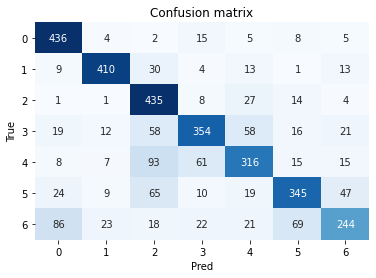

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

classes = np.unique(y_test)

cm = metrics.confusion_matrix(y_test, predicted)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)

# Transformar los textos en vectores con *bag-of-words* + *tf-idf*

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vector = TfidfVectorizer(tokenizer = feature_extraction, min_df=0., max_df=1.0)
from pandas import DataFrame

X = tfidf_vector.fit_transform(df1["full text"][0:100].astype('U'))

print(DataFrame(X.A, columns=tfidf_vector.get_feature_names()).to_string())

           $         '  -preclasificados  -reconocido     03:00         1      1921      1956      1988      2004      2009  2012-2030      2013      2015      2016  2016-2017      2017      2018      2019      2020         3         7         =  @pamjiles  abanderar  abandonar   abarcar  abastecimiento    abocar    abogar   abordar   abortar     abott     abril     abrir  absoluto   absurdo  abundante  abusadores    abusar   abusivo     abuso  académico   acceder    acceso  accionar    acción  acelerar   aceptar  acercamiento   acercar  acidificación   aclarar    acoger  acompañamiento  acompañar  aconcagua  acondicionar   acordar    acorde   acortar    acosar  acostumbrar  acostumbrarnos    acotar      acta  actividad  activista    activo      acto     actor  actuación    actual  actualidad  actualización  actualizarse    actuar    acudir   acuerdo  acumular  acusación    acusar  adaptación  adecuándonos  adjudicación  adjuntar   adjunto  administrativo   admitir  admplayer  adolesce

In [27]:
X = df1['full text'].astype('U') 
ylabels = df1['category'].astype('U')
lb = LabelEncoder()
ylabels_encoded = lb.fit_transform(ylabels)
X_train, X_test, y_train, y_test = train_test_split(X, ylabels_encoded, test_size=0.5)
model_2 = LogisticRegression()
pipe = Pipeline([('vectorizing', tfidf_vector),
                 ('learning', model_2)])
# model generation
pipe.fit(X_train,y_train)
predicted = pipe.predict(X_test.values.astype('U'))
predicted_proba = pipe.predict_proba(X_test.values.astype('U'))
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, predicted))

Logistic Regression Accuracy: 0.7877142857142857


[[436   1   1  15  10   4  17]
 [  5 439   2  10  12   5  23]
 [  0   2 401  12  34  18   9]
 [ 10  11  21 379  55  15  20]
 [  6   6  35  52 390  11  12]
 [ 13  12  19   7  12 370  63]
 [ 52  19   8  10  27  67 342]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       484
           1       0.90      0.89      0.89       496
           2       0.82      0.84      0.83       476
           3       0.78      0.74      0.76       511
           4       0.72      0.76      0.74       512
           5       0.76      0.75      0.75       496
           6       0.70      0.65      0.68       525

    accuracy                           0.79      3500
   macro avg       0.79      0.79      0.79      3500
weighted avg       0.79      0.79      0.79      3500



(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text major ticklabel objects>)

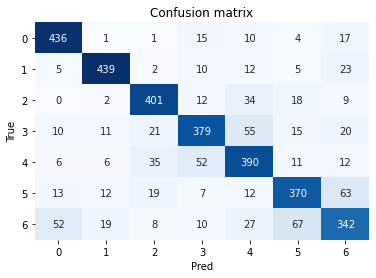

In [28]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, predicted)
print(confusion_matrix)

from sklearn.metrics import classification_report

print(classification_report(y_test, predicted))

classes = np.unique(y_test)

cm = metrics.confusion_matrix(y_test, predicted)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)

# k - means

In [29]:
X = df1['full text'].astype('U') 
ylabels = df1['category'].astype('U')
lb = LabelEncoder()
ylabels_encoded = lb.fit_transform(ylabels)
X_train, X_test, y_train, y_test = train_test_split(X, ylabels_encoded, test_size=0.5)

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vector = TfidfVectorizer(tokenizer = feature_extraction, min_df=0., max_df=1.0)
#X = tfidf_vector.fit_transform(df1["full text"][0:100].astype('U'))


from sklearn import neighbors
from sklearn.pipeline import Pipeline

n_neighbors = 27

knn = neighbors.KNeighborsClassifier(n_neighbors = n_neighbors)

model_knn = Pipeline([('vectorizing', tfidf_vector),
                 ('learning', knn)])

# model generation
model_knn.fit(X_train, y_train)
predicted = model_knn.predict(X_test.astype('U'))
predicted_proba = model_knn.predict_proba(X_test.values.astype('U'))
print("Logistic Regression Accuracy:",model_knn.score(X_test, y_test))

Logistic Regression Accuracy: 0.7257142857142858


              precision    recall  f1-score   support

           0       0.75      0.92      0.82       475
           1       0.88      0.85      0.87       480
           2       0.62      0.89      0.73       490
           3       0.75      0.66      0.70       538
           4       0.69      0.61      0.65       515
           5       0.74      0.66      0.70       519
           6       0.70      0.51      0.59       483

    accuracy                           0.73      3500
   macro avg       0.73      0.73      0.72      3500
weighted avg       0.73      0.73      0.72      3500



(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text major ticklabel objects>)

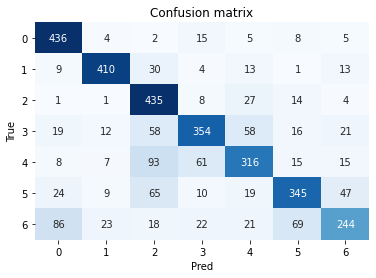

In [30]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
confusion_matrix = confusion_matrix(y_test, predicted)

from sklearn.metrics import classification_report

print(classification_report(y_test, predicted))

classes = np.unique(y_test)

cm = metrics.confusion_matrix(y_test, predicted)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)

In [31]:
k_range = range(1, 15)
scores = []

from progress.bar import Bar, ChargingBar
import os, time, random

bar2 = ChargingBar('procesando:', max=100)
for k in k_range:
    knn = neighbors.KNeighborsClassifier(n_neighbors = k)
    model_knn = Pipeline([('vectorizing', tfidf_vector),
                 ('learning', knn)])
    
    model_knn.fit(X_train, y_train)
    scores.append(model_knn.score(X_test, y_test))
    time.sleep(random.uniform(0, 0.2))
    bar2.next()
bar2.finish()

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

KeyboardInterrupt: 

In [ ]:
k_range = range(13, 20)
scores = []

from progress.bar import Bar, ChargingBar
import os, time, random


for k in k_range:
    knn = neighbors.KNeighborsClassifier(n_neighbors = k)
    model_knn = Pipeline([('vectorizing', tfidf_vector),
                 ('learning', knn)])
    
    model_knn.fit(X_train, y_train)
    scores.append(model_knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

([<matplotlib.axis.XTick at 0x19c83036d90>,
 <a list of 5 Text major ticklabel objects>)

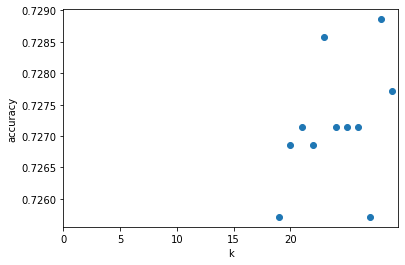

In [33]:
k_range = range(19, 30)
scores = []

from progress.bar import Bar, ChargingBar
import os, time, random


for k in k_range:
    knn = neighbors.KNeighborsClassifier(n_neighbors = k)
    model_knn = Pipeline([('vectorizing', tfidf_vector),
                 ('learning', knn)])
    
    model_knn.fit(X_train, y_train)
    scores.append(model_knn.score(X_test, y_test))


plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])